<a href="https://colab.research.google.com/github/kiminlim/ds-section1-sprint3/blob/master/n133-dimensionality-reduction-techniques/n133a-high-dimensional-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [10]:
import numpy as np

matrix = np.array([[4,2],
                          [2,4]])
matrix

array([[4, 2],
       [2, 4]])

In [11]:
value, vector = np.linalg.eig(matrix)
print("\n Eigenvalues: \n", value)
print("\n Eigenvectors: \n", vector)


 Eigenvalues: 
 [6. 2.]

 Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### 과제

In [69]:
# 과제 문항 1번 #
matrix = np.array([ [11, 10], [2, 8] ])
matrix

array([[11, 10],
       [ 2,  8]])

In [13]:
values, vectors = np.linalg.eig(matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [14.21699057  4.78300943]

 Eigenvectors: 
 [[ 0.95195352 -0.84925584]
 [ 0.30624255  0.52798155]]


In [14]:
values.max()

14.2169905660283

In [15]:
# 과제 2번 #
matrix = np.array([ [1, 7], [2, 2] ])
matrix

array([[1, 7],
       [2, 2]])

In [16]:
values, vectors = np.linalg.eig(matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [-2.27491722  5.27491722]

 Eigenvectors: 
 [[-0.9057736  -0.85343697]
 [ 0.42376194 -0.52119606]]


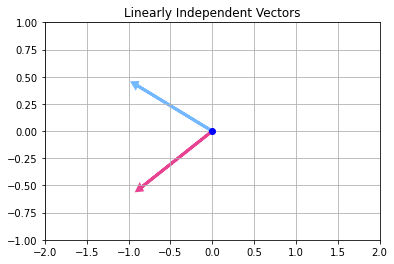

In [17]:
import matplotlib.pyplot as plt

plt.xlim(-2, 2)
plt.ylim(-1, 1)

a = [-0.9057736 , 0.42376194]
b = [-0.85343697 ,-0.52119606]
plt.arrow(0, 0, a[0], a[1], linewidth = 3, head_width = .05, head_length = .05, color = '#74b9ff')
plt.arrow(0, 0, b[0], b[1], linewidth = 3, head_width = .05, head_length = .05, color = '#e84393')
plt.grid(True)
# plt.axhline(0, 0, 1, color='gray', linestyle=':', linewidth='2')
# plt.axvline(0, 0, 1, color='gray', linestyle=':', linewidth='2')
plt.plot(0,0, 'bo')
plt.title("Linearly Independent Vectors")
plt.show()  # 그래프 상으로는 어떤 벡터의 좌표가 더 원점에서 먼지 잘 파악이 되질 않는다. 

In [18]:
# 고유 벡터의 거리 계산(피타고라스의 정리)
print(vectors[:,0]) # 고유 벡터 1
np.sqrt(0.95195352**2 + 0.30624255**2)

[-0.9057736   0.42376194]


1.0000000018354465

In [19]:
print(vectors[:,1]) # 고유 벡터 2
np.sqrt((-0.84925584)**2 + 0.52798155**2) #--> 2번째 고유벡터의 거리가 더 짧다. 

[-0.85343697 -0.52119606]


0.999999999457254

In [20]:
# L2_norm
mat = ([-0.9057736 ,  0.42376194])
mat2 = ([-0.85343697 ,-0.52119606])

def get_L2_norm(mat):
  return np.linalg.norm(mat, 2)
  
print(get_L2_norm(mat), get_L2_norm(mat2) )

0.9999999981247617 0.9999999973611522


In [21]:
get_L2_norm(mat)    >   get_L2_norm(mat2) #  2번째 벡터가 더 작음.

True

In [88]:
# L1 norm
abs(a[0]) +abs(a[1]) > abs(b[0]) +abs(b[1])

np.linalg.norm(mat, 1) > np.linalg.norm(mat2, 1) 

# L1 거리로 했을 땐 L2거리와 다르게 2번째 벡터가 더 거리가 멀다. 

False

In [22]:
-0.84925584 + 0.52798155 # L2거리에서 더 작음

-0.32127428999999996

In [77]:
-0.9057736 + 0.42376194 # L1거리에서 더 작음

-0.48201165999999995

## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [23]:
#  ratio : 원래의 분산을 몇%를 설명하는지에 대한 비율!

## sklearn 라이브러리를 사용한 주성분 분석

In [24]:
import seaborn
data = seaborn.load_dataset('penguins')
# data

In [25]:
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# X

In [26]:
X[X['body_mass_g'].isna()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [27]:
X.shape

(344, 4)

In [28]:
# 결측치
# 결측치가 3, 339 index의 두 행이 모두 결측치 이므로 제거하였다.

X = X.dropna()
X.shape

(342, 4)

In [29]:
# sklearn 라이브러리를 사용한 주성분 분석 #
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

print("Data: \n", X)

scaler = StandardScaler()
Z = scaler.fit_transform(X) # 데이터 표준화 
print("\n Standardized Data: \n", Z)

pca = PCA(2) # 2개의 주성분분석 모델 생성

pca.fit(Z) # 모델 적합 X 말고 표준화된 Z데이터를 써야함!!!
#------ 왜 직접 구한 값과 차이가 있나 했더니 강의 노트 코드에서 표준화 하기 전 데이터를 피팅한걸 그대로 긁어와서 차이가 크게 났었다....
print("\n Eigenvectors: \n", pca.components_) # 고유 벡터
print("\n Eigenvalues: \n",pca.explained_variance_) # 고유값

B = pca.transform(Z) # 분석 결과 
print("\n Projected Data: \n", B[:10]) # 2개로 차원 축소된 것을 확인할 수 있다. 

Data: 
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[342 rows x 4 columns]

 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -

In [31]:
import pandas as pd

principalDf = pd.DataFrame(data =B , columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210
...,...,...
337,2.006436,-0.958909
338,1.840886,-0.767714
339,2.760742,0.288886
340,1.722364,-0.704269


In [32]:
ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])

In [33]:
ratio[0] 

0.6884387809732921

In [34]:
# 원래 변수 분산합 = 주성분 점수의 분산합
data.iloc[:,2:6].var()  #원 변수의 분산합
# X.var() # 3339390.444063729

bill_length_mm           29.807054
bill_depth_mm             3.899808
flipper_length_mm       197.731792
body_mass_g          643131.077327
dtype: float64

In [35]:
principalDf.var() #주성분 점수의 분산---전혀 다르다. 표준화를 안하고 해도 완전히 같지는 않아서 다음에 알아봐야겠다

pc1    2.761831
pc2    0.774782
dtype: float64

## 라이브러리 사용x 직접 계산 과정

In [105]:
import numpy as np

X = np.array(X)
print("Data: ", X)

Data:  [[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


In [106]:
# Normalize
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof = 0, axis = 0)
print("\n Standardized Data: \n", standardized_data)


 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]


In [107]:
#Z의 분산-공분산 매트릭스
covariance_matrix = np.cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)


 Covariance Matrix: 
 [[ 1.00293255 -0.23574217  0.65810563  0.59685501]
 [-0.23574217  1.00293255 -0.58556339 -0.47329954]
 [ 0.65810563 -0.58556339  1.00293255  0.87375661]
 [ 0.59685501 -0.47329954  0.87375661  1.00293255]]


In [108]:
# 분산-공분산 매트릭스의 고유벡터와 고유값
values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Eigenvalues: 
 [2.76183065 0.7747822  0.36630698 0.10881037]

 Eigenvectors: 
 [[-0.45525033  0.59703114  0.64430115  0.14552311]
 [ 0.40033468  0.79776657 -0.41842724 -0.16798597]
 [-0.57601332  0.0022822  -0.23208397 -0.78379875]
 [-0.54835019  0.08436292 -0.59660012  0.57988211]]


In [109]:
# 데이터를 고유 벡터에 projection
Z = np.matmul(standardized_data, vectors)

print("\n Projected Data: \n", Z)


 Projected Data: 
 [[ 1.84344489  0.04770222 -0.23279416  0.52390297]
 [ 1.30676189 -0.42834824 -0.02956235  0.40242643]
 [ 1.36918099 -0.1544764   0.1986723  -0.52800677]
 ...
 [-2.76074201  0.28888648 -0.42843943  0.24071657]
 [-1.72236378 -0.70426942 -0.27697945  0.33851609]
 [-2.02890193  0.35762008 -0.16289253  0.4422372 ]]


In [110]:
print(np.var(Z[:,0]),np.var(Z[:,1])) # 사이킷런으로 구한 주성분의 분산과 거의 비슷하다. 

2.75375512389317 0.7725167538558826


In [111]:
principalDf.var()

pc1    2.761831
pc2    0.774782
dtype: float64

## PCA 시각화

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# data =data.drop(index=[3,339])

In [90]:
data.dropna().isnull().sum().sum()

0

In [91]:
data.shape

(342, 7)

In [92]:
df = pd.DataFrame({"pc1": B[:,0], "pc2": B[:,1], "species":data['species']})

In [93]:
df.shape

(342, 3)

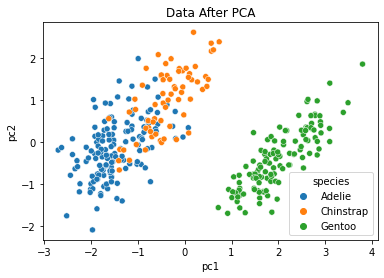

In [94]:
# 사이킷런 주성분분석 
sns.scatterplot(x='pc1', y='pc2',hue='species', data = df)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()  # 4개의 변수를 2개의 pca1, pca2 변수로 축소하여 타켓변수인 species를 잘 나타내는지 그래프로 시각화한 모습

In [95]:
# 직접 구한 pca

df1 = pd.DataFrame({"pc1": Z[:,0], "pc2":Z[:,1], "species":data['species']})
df2 = pd.DataFrame({"pc1": Z[:,0], "pc3":Z[:,2], "species":data['species']})
df3 = pd.DataFrame({"pc1": Z[:,0], "pc4":Z[:,3], "species":data['species']})
df4 = pd.DataFrame({"pc3": Z[:,2], "pc4":Z[:,3], "species":data['species']})

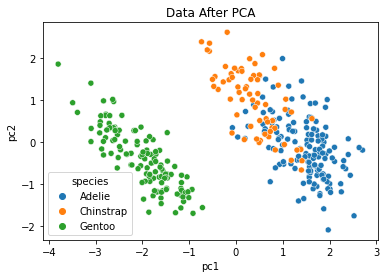

In [96]:
sns.scatterplot(x='pc1', y='pc2',hue='species', data = df1)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()  # 4개의 주성분 중 앞의 1,2번을 선택하여 시각화함. -- 사이킷런과 왜 분산은 비슷한데 부호만 반대이다. (계산과정에서 마이너스가 한번 곱해지는 것 같다.)

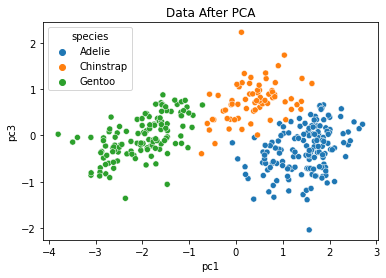

In [97]:
sns.scatterplot(x='pc1', y='pc3',hue='species', data = df2)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc3')
plt.show()  # 4개의 주성분 중 1&3번째를 선택하여 시각화. 이게 군집분류가 더 잘되는 것 같아보이는데 맞나?

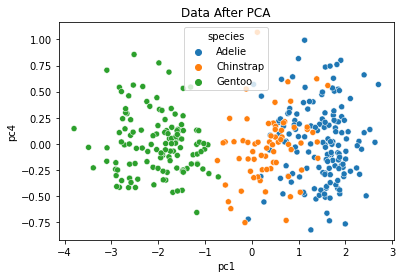

In [98]:
sns.scatterplot(x='pc1', y='pc4',hue='species', data = df3)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc4')
plt.show()  # 4개의 주성분 중 1&4번

In [99]:
# sns.scatterplot(x='pc3', y='pc4',hue='species', data = df4)
# plt.title("Data After PCA")
# plt.xlabel('pc3')
# plt.ylabel('pc4')
# plt.show() # 3&4번은 시각화 결과 의미x

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [100]:
# # 이곳에 답안을 작성하시기 바랍니다
# plt.title('scree plot')
# plt.xlabel('Number')
# plt.ylabel('Variance')
# plt.plot(pca.explained_variance_,'o-')

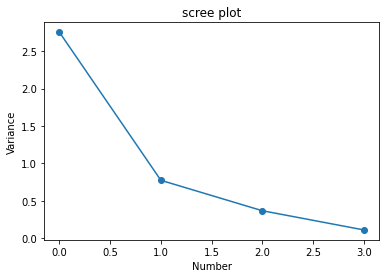

In [101]:
# 직접 구한 값의 시각화 
plt.title('scree plot')
plt.xlabel('Number')
plt.ylabel('Variance')
plt.plot([np.var(Z[:,0]),np.var(Z[:,1]),np.var(Z[:,2]),np.var(Z[:,3])],'o-') # scree plot은 각 주성분의 설명력을 보기 위한 그래프. 꺾이는 지점까지 사용한다.

In [102]:
# 설명력 계산
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)

# 에이겐벨류의 설명 분산 비율
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 에이겐벨류 / 에이겐벨류의 합 을 각각 구한다. 나온 각각의 값은 아이겐벨류의 설명 분산 비율
# 즉, 어떤 에이겐벨류가 가장 설명력이 높은지를 비율로 나타내기 위한 것

cum_var_exp = np.cumsum(var_exp) # 누적 합을 계산해주는 함수. -> 누적 백분위로 표현

In [103]:
var_exp # 고유값의 설명 분산 비율

[0.6884387809732924,
 0.1931291884639706,
 0.09130897660295595,
 0.027123053959781023]

In [104]:
cum_var_exp # 설명력의 누적합을 보았을 때 3번째 주성분까지 사용했을 때 0.97로  90%가 넘어가는 것을 확인할 수 있다.

array([0.68843878, 0.88156797, 0.97287695, 1.        ])

## 도전과제 결론 : 3개의 pc를 사용해야 90% 이상의 설명력을 가진다.